## Improting all the necessary Libraries

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

# Problem Statement

##  Problem 1: Linear Regression

Your objective is to accurately predict prices of the zircon pieces. Since the company profits at a different rate at different price levels, for revenue management, it is important that prices are predicted as accurately as possible. At the same time, it is important to understand which of the predictors are more important in determining the price.

The data dictionary is given below.

Data Dictionary:

Variable Name - Description

Carat - Carat weight of the cubic zirconia.

Cut - Describes the cut quality of the cubic zirconia. Quality is in increasing order: Fair, Good, Very Good, Premium, Ideal.

Colour - Colour of the cubic zirconia.

Clarity - Cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth - The Height of a cubic zirconia piece, measured from the Culet to the table, divided by its average Girdle Diameter.

Table - The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price -Price of the cubic zirconia.

X - Length of the cubic zirconia in mm.

Y - Width of the cubic zirconia in mm.

Z - Height of the cubic zirconia in mm.

In [2]:
#Read csv file
df=pd.read_csv('cubic_zirconia.csv')
df.head()

,Sl No,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


1. The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. Since this is a regression problem, the dependence of the response on the predictors needs to be thoroughly investigated.

# Exploratory Data Analysis

### Identify data types of each column and validate

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
Sl No      26967 non-null int64
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


### Check for duplicate data across columns and drop those

In [4]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(26967, 11)


## Inference: There are no duplicate data

### Check for missing values and impute the missing values, if any is present.

In [5]:
df.isna().sum()

Sl No        0
carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [6]:
avg_depth=np.mean(df['depth'])
avg_depth

61.745146555006194

In [9]:
avg_depth=np.median(df['depth'])
avg_depth

61.8

In [10]:
df['depth'].fillna(value=61.75, inplace=True)
df['depth'].dtype

dtype('float64')

In [11]:
df.isna().sum()

Sl No      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
Sl No      26967 non-null int64
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26967 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


### Check the data types of all the variables and get the unique counts of all the 'Object' type variables.

In [13]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64


color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64


clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64




## Univariate Analysis

**Histogram and boxplot for numeric variables**

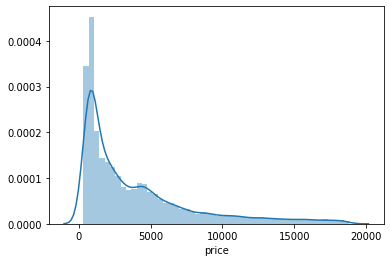

In [14]:
sns.distplot(df['price'])

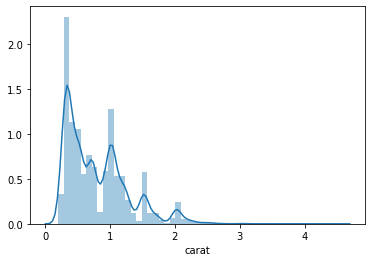

In [15]:
sns.distplot(df['carat'])

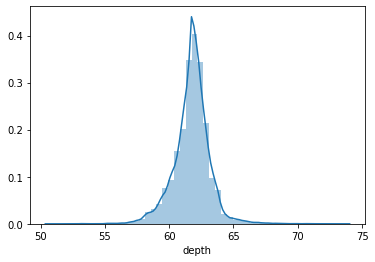

In [16]:
sns.distplot(df['depth'])

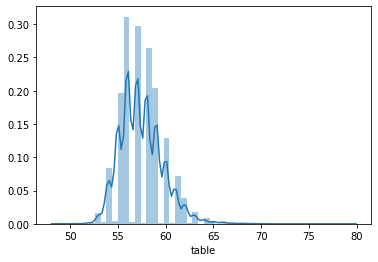

In [17]:
sns.distplot(df['table'])

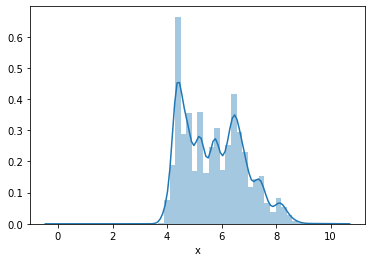

In [18]:
sns.distplot(df['x'])

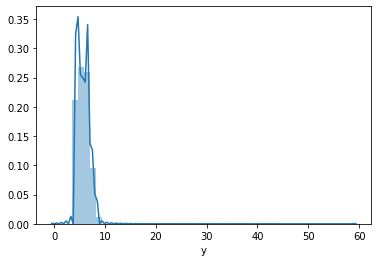

In [19]:
sns.distplot(df['y'])

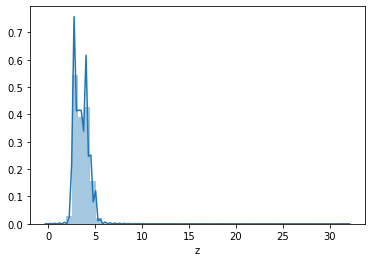

In [20]:
sns.distplot(df['z'])

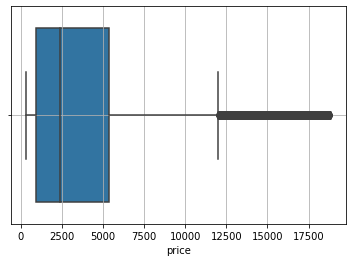

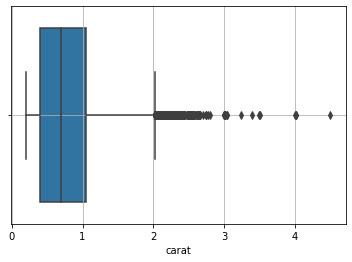

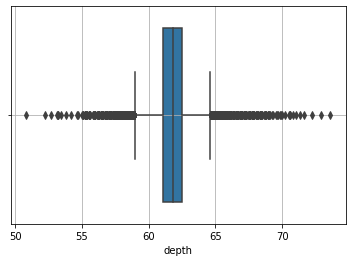

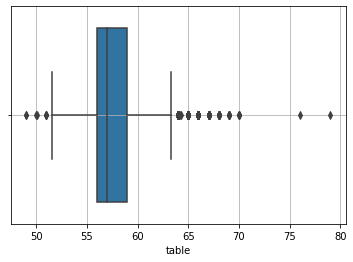

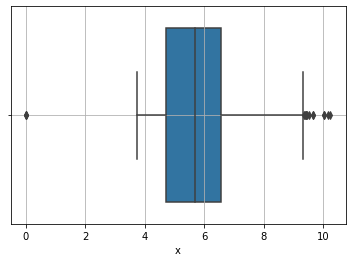

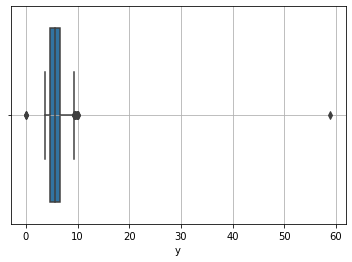

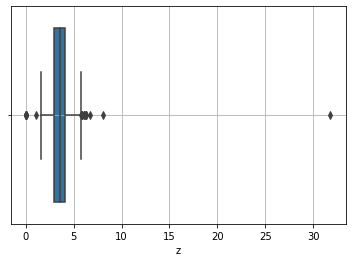

In [21]:
cols = ['price','carat','depth','table','x','y','z']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

## Categorical variables - table and barplot

In [22]:
df['cut'].value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

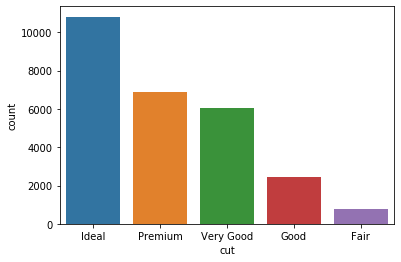

In [23]:
sns.countplot(df['cut'])

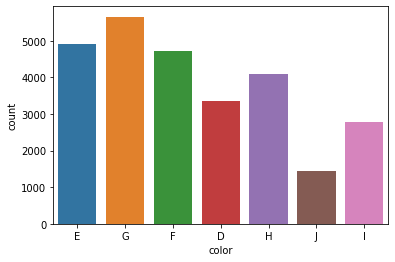

In [24]:
sns.countplot(df['color'])

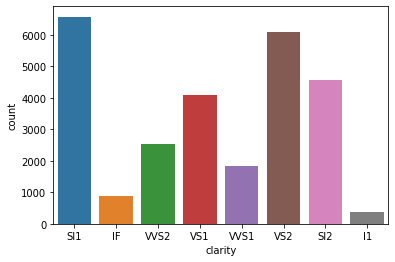

In [25]:
sns.countplot(df['clarity'])

## Bivariate Analysis
* correlation plot for continuous vs continuous
* boxplot for continuous vs categorical
* crosstab for continuous vs categorical

### Correlation plot for continuous vs continuous

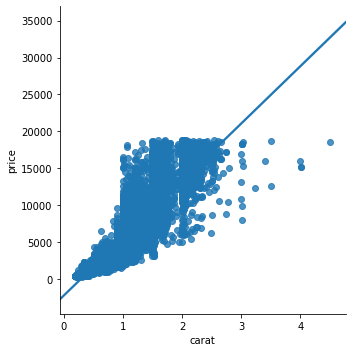

In [26]:
#Lmplot gives best fit line in addition to scatter
sns.lmplot(x='carat', y='price',data=df)

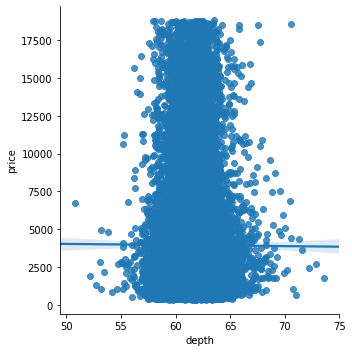

In [27]:
sns.lmplot(x='depth', y='price',data=df)

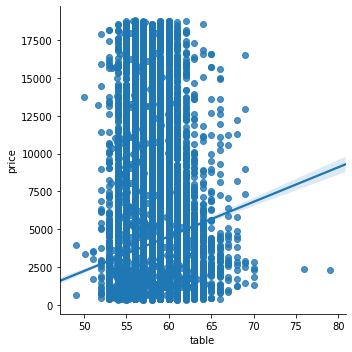

In [28]:
sns.lmplot(x='table', y='price',data=df)

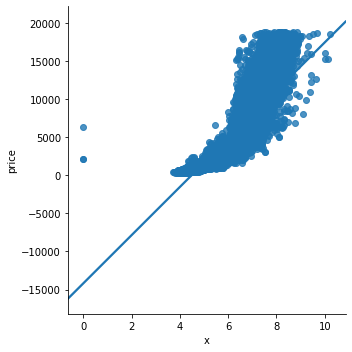

In [29]:
sns.lmplot(x='x', y='price',data=df)

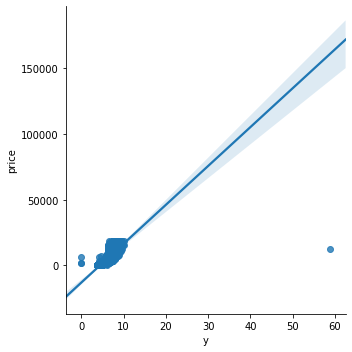

In [30]:
sns.lmplot(x='y', y='price',data=df)

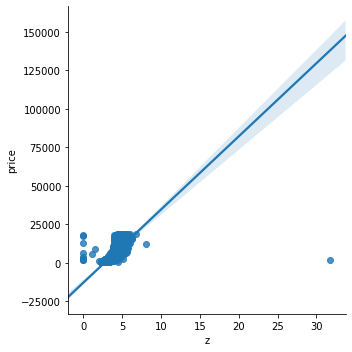

In [31]:
sns.lmplot(x='z', y='price',data=df)

### Boxplot for continuous vs categorical

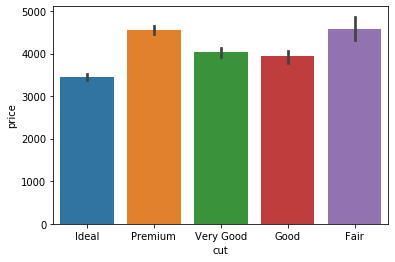

In [32]:
sns.barplot(data = df, x='cut',y='price')

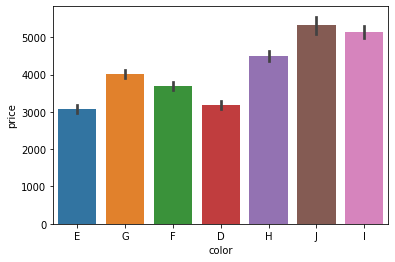

In [33]:

sns.barplot(data = df, x='color',y='price')

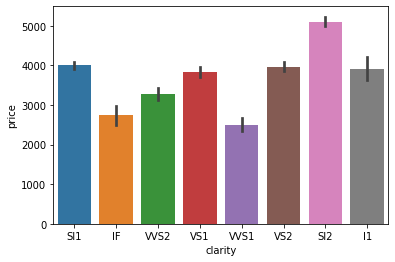

In [34]:
sns.barplot(data = df, x='clarity',y='price')

### Crosstab for continuous vs categorical

In [35]:
pd.crosstab(df['cut'], df['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,74,100,148,147,150,94,68
Good,311,491,454,419,352,253,161
Ideal,1409,1966,1893,2470,1552,1073,453
Premium,808,1174,1167,1471,1161,711,407
Very Good,742,1186,1067,1154,887,640,354


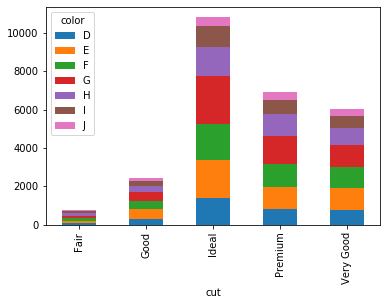

In [36]:
pd.crosstab(df['cut'], df['color']).plot(kind = 'bar', stacked = True)

In [37]:
pd.crosstab(df['cut'], df['clarity'])

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,89,4,193,225,93,129,10,38
Good,51,30,765,530,331,491,100,143
Ideal,74,613,2150,1324,1784,2528,1036,1307
Premium,108,115,1809,1449,998,1697,307,416
Very Good,43,132,1654,1047,887,1254,386,627


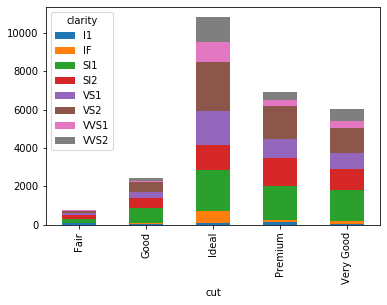

In [38]:
pd.crosstab(df['cut'], df['clarity']).plot(kind = 'bar', stacked = True)

# High Level Findings from EDA

### Dropping the first column as not adding any value

In [39]:
df.drop(labels=['Sl No'],axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### Treating the outliers at 1.5 * IQR (Inter-Quartile Range).

In [40]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [41]:
for column in df.columns:
    if df[column].dtype != 'object': 
       lr,ur=remove_outlier(df[column])
       df[column]=np.where(df[column]>ur,ur,df[column])
       df[column]=np.where(df[column]<lr,lr,df[column])

### Checking for Correlations. Print the correlation matrix and the correlation heatmap.

In [42]:
# Correlation matrix
cor = df.corr()
cor

,carat,depth,table,x,y,z,price
carat,1.000000,0.029497,0.187395,0.982207,0.981285,0.977328,0.936741
depth,0.029497,1.000000,-0.289572,-0.019962,-0.022989,0.095136,-0.000804
table,0.187395,-0.289572,1.000000,0.199146,0.193530,0.159425,0.137971
x,0.982207,-0.019962,0.199146,1.000000,0.998495,0.988179,0.912759
y,0.981285,-0.022989,0.193530,0.998495,1.000000,0.987853,0.914191
z,0.977328,0.095136,0.159425,0.988179,0.987853,1.000000,0.905737
price,0.936741,-0.000804,0.137971,0.912759,0.914191,0.905737,1.000000


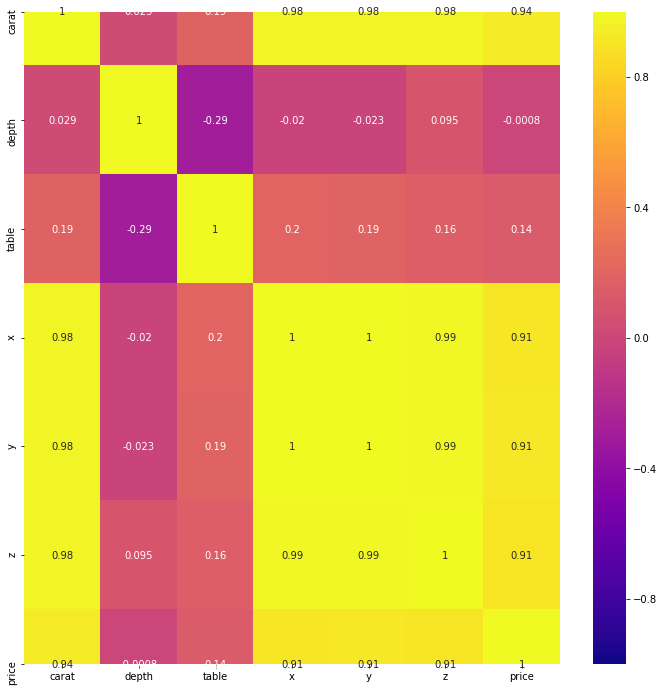

In [43]:
# View heat map of the correlation matrix
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, vmin = -1, vmax = 1, cmap = 'plasma', annot = True);

In [44]:
#Highly correlated variables
c = cor.abs()

# Unstack the correlation matrix
s = c.unstack()

#Filter to exclude values of 1
s = s[s != 1]

# Sort descending to find the highly correlated variables
so = s.sort_values(kind="quicksort", ascending=False)[:15]
so

x      y        0.998495
y      x        0.998495
x      z        0.988179
z      x        0.988179
       y        0.987853
y      z        0.987853
x      carat    0.982207
carat  x        0.982207
y      carat    0.981285
carat  y        0.981285
z      carat    0.977328
carat  z        0.977328
       price    0.936741
price  carat    0.936741
y      price    0.914191
dtype: float64

2. Use Full Data to develop a model to identify significant predictors. Check whether the proposed model is free of multicollinearity. Apply variable selection method as required. Show all intermediate models leading to the final model. Justify your choice of the final model. Which are the significant predictors?

## Model Building

In [45]:
import statsmodels.api as sm

## Simple Linear Regression

In [46]:
X1 = df[['carat']]
Y = df[['price']]

In [47]:
# Add an intercept to X for our model
X1  = sm.add_constant(X1)

In [48]:
#Build model and model summary
model_SLR_carat = sm.OLS(Y,X1).fit()
model_SLR_carat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                 1.931e+05
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:53:58   Log-Likelihood:            -2.2979e+05
No. Observations:               26967   AIC:                         4.596e+05
Df Residuals:                   26965   BIC:                         4.596e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1841.7894     14.695   -125.336      0.000   -1870.592   -1812.987
carat       7030.9392     15.999    439.463      0.000    6999.580    7062.298
==============================================================================
Omnibus:                     6285.528   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30335.382
Skew:                           1.052   Prob(JB):                         0.00
Kurtosis:                       7.751   Cond. No.                         3.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Compare Rsq and correlation coef

In [49]:
from scipy.stats import pearsonr

In [50]:
#Correlation coefficient
pearsonr(df['carat'],df['price'])[0]

0.9367408567138602

In [51]:
#Square of correlation coefficient
np.square(pearsonr(df['carat'],df['price'])[0])

0.8774834326370168

In [52]:
#R squared from model
model_SLR_carat.rsquared

0.8774834326370169

## Multiple Linear Regression

* Build Model Summary
* Overall Significance of the Model
* R square and goodness of fit
* Individual coef significance
* Interpret coef beta

In [53]:
#Split data into X and Y
X = df.drop(['price'], axis=1)
Y = df[['price']]

In [54]:
#One hot encoding X
X = pd.get_dummies(X)
X.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [55]:
# Add an intercept to X for our model
X  = sm.add_constant(X)

In [56]:
#Build Model
model_MLR = sm.OLS(Y, X).fit()

In [57]:
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.860e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:56:38   Log-Likelihood:            -2.2000e+05
No. Observations:               26967   AIC:                         4.401e+05
Df Residuals:                   26943   BIC:                         4.402e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           377.2766    371.354      1.016      0.310    -350.597    1105.150
carat          9083.0554     62.756    144.736      0.000    8960.051    9206.060
depth           -11.9477      7.132     -1.675      0.094     -25.927       2.032
table           -19.8292      3.206     -6.185      0.000     -26.114     -13.545
x             -1222.6822     96.235    -12.705      0.000   -1411.308   -1034.056
y               910.7283     96.204      9.467      0.000     722.163    1099.294
z              -214.6259     76.049     -2.822      0.005    -363.685     -65.567
cut_Fair       -371.8861     82.483     -4.509      0.000    -533.558    -210.214
cut_Good         46.3092     79.171      0.585      0.559    -108.871     201.489
cut_Ideal       279.9350     70.492      3.971      0.000     141.766     418.104
cut_Premium     253.2498     73.376      3.451      0.001     109.430     397.070
cut_Very Good   169.6685     74.561      2.276      0.023      23.526     315.811
color_D         760.5513     54.684     13.908      0.000     653.367     867.735
color_E         560.0972     54.155     10.342      0.000     453.951     666.244
color_F         505.1340     54.234      9.314      0.000     398.833     611.435
color_G         337.6416     54.324      6.215      0.000     231.165     444.119
color_H         -88.7852     54.586     -1.627      0.104    -195.776      18.205
color_I        -559.0392     55.299    -10.109      0.000    -667.428    -450.650
color_J       -1138.3232     56.831    -20.030      0.000   -1249.716   -1026.931
clarity_I1    -2835.4127     62.258    -45.543      0.000   -2957.442   -2713.383
clarity_IF     1271.2510     52.143     24.380      0.000    1169.048    1373.454
clarity_SI1    -172.0993     48.782     -3.528      0.000    -267.714     -76.485
clarity_SI2    -995.7202     49.026    -20.310      0.000   -1091.813    -899.627
clarity_VS1     642.6909     48.328     13.298      0.000     547.965     737.417
clarity_VS2     354.8233     48.250      7.354      0.000     260.250     449.396
clarity_VVS1   1067.1504     49.469     21.572      0.000     970.190    1164.111
clarity_VVS2   1044.5933     48.976     21.329      0.000     948.599    1140.588
==============================================================================
Omnibus:                     6587.607   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24698.550
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       7.043   Cond. No.                     1.05e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-26. This 

**Collect the regression coefficients and p-values of independent variables in a new dataframe. Find out which coefficients are significant and their impact on the Y variable.**

In [58]:
reg_coeff = pd.DataFrame(model_MLR.params, columns=['coef'])
reg_coeff

,coef
const,377.276567
carat,9083.055447
depth,-11.947662
table,-19.829162
x,-1222.682161
y,910.728294
z,-214.625905
cut_Fair,-371.886074
cut_Good,46.309245
cut_Ideal,279.935032


In [59]:
reg_coeff['pval'] = model_MLR.pvalues.round(3)
reg_coeff

,coef,pval
const,377.276567,0.310
carat,9083.055447,0.000
depth,-11.947662,0.094
table,-19.829162,0.000
x,-1222.682161,0.000
y,910.728294,0.000
z,-214.625905,0.005
cut_Fair,-371.886074,0.000
cut_Good,46.309245,0.559
cut_Ideal,279.935032,0.000


### Feature Selection - Remove education and population - pval not significant

In [60]:
X.drop(['depth', 'cut_Good', 'cut_Very Good', 'color_H'], axis=1, inplace=True)

In [61]:
# Add an intercept to X for our model
X  = sm.add_constant(X)

model_MLR_new = sm.OLS(Y, X).fit()

In [62]:
model_MLR_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 2.033e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:56:51   Log-Likelihood:            -2.2002e+05
No. Observations:               26967   AIC:                         4.401e+05
Df Residuals:                   26945   BIC:                         4.403e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -214.8355    179.538     -1.197      0.231    -566.738     137.067
carat         9069.5460     62.044    146.178      0.000    8947.936    9191.156
table          -20.7187      3.069     -6.752      0.000     -26.733     -14.704
x            -1224.5569     95.620    -12.807      0.000   -1411.976   -1037.138
y              994.2538     92.557     10.742      0.000     812.836    1175.671
z             -337.3598     54.260     -6.217      0.000    -443.713    -231.007
cut_Fair      -500.5697     33.672    -14.866      0.000    -566.568    -434.572
cut_Ideal      145.5430     14.334     10.154      0.000     117.448     173.638
cut_Premium    125.4902     14.948      8.395      0.000      96.192     154.788
color_D        849.5787     20.057     42.359      0.000     810.267     888.891
color_E        649.3613     18.201     35.678      0.000     613.687     685.036
color_F        593.5582     18.205     32.605      0.000     557.876     629.241
color_G        426.5962     17.488     24.393      0.000     392.318     460.874
color_I       -470.2298     20.885    -22.515      0.000    -511.165    -429.294
color_J      -1050.4329     26.106    -40.237      0.000   -1101.603    -999.263
clarity_I1   -2917.2630     46.997    -62.073      0.000   -3009.380   -2825.147
clarity_IF    1200.4841     33.725     35.596      0.000    1134.381    1266.587
clarity_SI1   -248.1941     25.928     -9.573      0.000    -299.014    -197.375
clarity_SI2  -1071.9767     27.025    -39.666      0.000   -1124.947   -1019.006
clarity_VS1    569.5323     26.322     21.637      0.000     517.940     621.125
clarity_VS2    280.9524     25.605     10.973      0.000     230.765     331.140
clarity_VVS1   996.7640     28.751     34.669      0.000     940.411    1053.117
clarity_VVS2   974.8656     27.500     35.450      0.000     920.964    1028.767
==============================================================================
Omnibus:                     6556.430   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24572.237
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                       7.036   Cond. No.                     2.20e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.89e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Interpret Coef and significance

In [63]:
reg_coeff = pd.DataFrame(model_MLR_new.params, columns=['coef'])
reg_coeff['pval'] = model_MLR_new.pvalues.round(3)
reg_coeff.sort_values(by='coef', ascending = False)

,coef,pval
carat,9069.546020,0.000
clarity_IF,1200.484073,0.000
clarity_VVS1,996.764005,0.000
y,994.253759,0.000
clarity_VVS2,974.865601,0.000
color_D,849.578679,0.000
color_E,649.361294,0.000
color_F,593.558236,0.000
clarity_VS1,569.532289,0.000
color_G,426.596159,0.000


## Feature Selection - Multicollinearity and VIF

# The formula for VIF calculation is :
# vif = $\frac{1}{1 - {R^2}}$

Below is the function that is created to calculate the Variance Inflation Factor (VIF) values.
- 1st line code is about defining a function "vif_cal" which we shall use to call the function.
- We then define the x or the predictor variables. 
- The second step is to get the data in each of the column variable
- Then we define a 'for' loop where the y or the target variable is defined as one of the variables of the input data set.
- The x or the predictor variables are then defined as all the variables of the input data except the y or the target variable defined in the last step.
- We then fit a regression function and calculate the ${R^2}$ value which is being stored in the variable rsq.
- Another variable by the name of vif is defined and the ${R^2}$ value is put into the formula of the vif calculation.
- Lastly, we print this value.

This process is being repeated for all the predictor variables.


In [64]:
import statsmodels.formula.api as SM

In [65]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [66]:
xvar = df.drop(['price'], axis=1)
xvar = pd.get_dummies(xvar)
xvar.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [67]:
vif_cal(xvar)

carat  VIF =  332.37
depth  VIF =  332.37
table  VIF =  332.37
x  VIF =  332.37
y  VIF =  332.37
z  VIF =  332.37
cut_Fair  VIF =  332.37
cut_Good  VIF =  332.37
cut_Ideal  VIF =  332.37
cut_Premium  VIF =  332.37
cut_Very Good  VIF =  332.37
color_D  VIF =  332.37
color_E  VIF =  332.37
color_F  VIF =  332.37
color_G  VIF =  332.37
color_H  VIF =  332.37
color_I  VIF =  332.37
color_J  VIF =  332.37
clarity_I1  VIF =  332.37
clarity_IF  VIF =  332.37
clarity_SI1  VIF =  332.37
clarity_SI2  VIF =  332.37
clarity_VS1  VIF =  332.37
clarity_VS2  VIF =  332.37
clarity_VVS1  VIF =  332.37
clarity_VVS2  VIF =  332.37


3. Alternatively, if prediction accuracy of the price is the only objective, then you may want to divide the data into a training and a test set, chosen randomly, and use the training set to develop a model and test set to validate your model. Use the models developed in Part (2) to compare accuracy in training and test sets. Compare the final model of Part (2) and the proposed one in Part (3). Which model provides the most accurate prediction? If the model found in Part (2) is different from the proposed model in Part (3), give an explanation.

## Multiple Linear Regression - Model 2

**drop some correlated variable to avoid multicolinearity**

In [68]:
xvar.drop(['x','y','z'], axis=1, inplace=True)
xvar.columns

Index(['carat', 'depth', 'table', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [69]:
vif_cal(xvar)

carat  VIF =  1.33
depth  VIF =  1.35
table  VIF =  1.8
cut_Fair  VIF =  inf
cut_Good  VIF =  inf
cut_Ideal  VIF =  inf
cut_Premium  VIF =  inf
cut_Very Good  VIF =  inf
color_D  VIF =  inf
color_E  VIF =  inf
color_F  VIF =  inf
color_G  VIF =  inf
color_H  VIF =  inf
color_I  VIF =  inf
color_J  VIF =  inf
clarity_I1  VIF =  inf
clarity_IF  VIF =  inf
clarity_SI1  VIF =  inf
clarity_SI2  VIF =  inf
clarity_VS1  VIF =  inf
clarity_VS2  VIF =  inf
clarity_VVS1  VIF =  inf
clarity_VVS2  VIF =  inf


In [70]:
xvar.drop(['color_H','cut_Good','clarity_VVS2'], axis=1, inplace=True)
xvar.columns

Index(['carat', 'depth', 'table', 'cut_Fair', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1'],
      dtype='object')

In [71]:
vif_cal(xvar)

carat  VIF =  1.33
depth  VIF =  1.35
table  VIF =  1.8
cut_Fair  VIF =  1.32
cut_Ideal  VIF =  4.31
cut_Premium  VIF =  3.09
cut_Very Good  VIF =  2.83
color_D  VIF =  1.65
color_E  VIF =  1.86
color_F  VIF =  1.8
color_G  VIF =  1.91
color_I  VIF =  1.51
color_J  VIF =  1.3
clarity_I1  VIF =  1.19
clarity_IF  VIF =  1.32
clarity_SI1  VIF =  2.84
clarity_SI2  VIF =  2.55
clarity_VS1  VIF =  2.24
clarity_VS2  VIF =  2.69
clarity_VVS1  VIF =  1.62


In [72]:
xvar.drop(['cut_Ideal'], axis=1, inplace=True)
xvar.columns

Index(['carat', 'depth', 'table', 'cut_Fair', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1'],
      dtype='object')

In [73]:
vif_cal(xvar)

carat  VIF =  1.33
depth  VIF =  1.22
table  VIF =  1.44
cut_Fair  VIF =  1.18
cut_Premium  VIF =  1.42
cut_Very Good  VIF =  1.25
color_D  VIF =  1.65
color_E  VIF =  1.86
color_F  VIF =  1.8
color_G  VIF =  1.91
color_I  VIF =  1.51
color_J  VIF =  1.3
clarity_I1  VIF =  1.18
clarity_IF  VIF =  1.32
clarity_SI1  VIF =  2.83
clarity_SI2  VIF =  2.55
clarity_VS1  VIF =  2.24
clarity_VS2  VIF =  2.69
clarity_VVS1  VIF =  1.62


In [74]:
#Split data into X and Y
X1 = df.drop(['price', 'x', 'y', 'z'], axis=1)
Y = df[['price']]

In [75]:
#One hot encoding X
X1 = pd.get_dummies(X1)
X1.columns

Index(['carat', 'depth', 'table', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [76]:
# Add an intercept to X for our model
X1  = sm.add_constant(X1)

In [77]:
#Build Model
model_MLR1 = sm.OLS(Y, X1).fit()

In [78]:
model_MLR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 2.105e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:57:10   Log-Likelihood:            -2.2021e+05
No. Observations:               26967   AIC:                         4.405e+05
Df Residuals:                   26946   BIC:                         4.406e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -904.1074    284.907     -3.173      0.002   -1462.541    -345.674
carat          8019.3625     12.913    621.038      0.000    7994.053    8044.672
depth            -8.8431      4.952     -1.786      0.074     -18.550       0.864
table           -20.0232      3.225     -6.208      0.000     -26.345     -13.701
cut_Fair       -680.2589     68.967     -9.864      0.000    -815.438    -545.080
cut_Good       -188.7754     61.996     -3.045      0.002    -310.291     -67.260
cut_Ideal        36.6946     51.492      0.713      0.476     -64.232     137.621
cut_Premium     -23.3428     56.011     -0.417      0.677    -133.128      86.442
cut_Very Good   -48.4248     56.748     -0.853      0.393    -159.654      62.805
color_D         576.5925     42.788     13.475      0.000     492.725     660.460
color_E         375.1174     42.206      8.888      0.000     292.391     457.844
color_F         311.3485     42.005      7.412      0.000     229.016     393.681
color_G         143.4208     42.140      3.403      0.001      60.824     226.018
color_H        -272.6554     42.685     -6.388      0.000    -356.321    -188.990
color_I        -731.4678     43.794    -16.703      0.000    -817.306    -645.630
color_J       -1306.4634     45.881    -28.475      0.000   -1396.392   -1216.535
clarity_I1    -3041.0899     54.807    -55.488      0.000   -3148.514   -2933.666
clarity_IF     1155.1993     43.416     26.608      0.000    1070.102    1240.297
clarity_SI1    -355.3552     38.021     -9.346      0.000    -429.879    -280.832
clarity_SI2   -1181.4761     38.489    -30.696      0.000   -1256.917   -1106.035
clarity_VS1     478.6279     37.948     12.613      0.000     404.247     553.008
clarity_VS2     188.1455     37.763      4.982      0.000     114.128     262.163
clarity_VVS1    946.3169     40.207     23.536      0.000     867.508    1025.125
clarity_VVS2    905.5243     39.136     23.138      0.000     828.816     982.232
==============================================================================
Omnibus:                     5945.280   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18609.003
Skew:                           1.129   Prob(JB):                         0.00
Kurtosis:                       6.386   Cond. No.                     1.31e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Collect the regression coefficients and p-values of independent variables in a new dataframe. Find out which coefficients are significant and their impact on the Y variable.**

In [79]:
reg_coeff = pd.DataFrame(model_MLR1.params, columns=['coef'])
reg_coeff

,coef
const,-904.107353
carat,8019.362461
depth,-8.843122
table,-20.023164
cut_Fair,-680.258911
cut_Good,-188.775375
cut_Ideal,36.694568
cut_Premium,-23.342823
cut_Very Good,-48.424812
color_D,576.592460


In [80]:
reg_coeff['pval'] = model_MLR1.pvalues.round(3)
reg_coeff

,coef,pval
const,-904.107353,0.002
carat,8019.362461,0.000
depth,-8.843122,0.074
table,-20.023164,0.000
cut_Fair,-680.258911,0.000
cut_Good,-188.775375,0.002
cut_Ideal,36.694568,0.476
cut_Premium,-23.342823,0.677
cut_Very Good,-48.424812,0.393
color_D,576.592460,0.000


### Feature Selection - Remove Depth, Cut Premium, Cut very good - pval not significant

In [81]:
X1.drop(['depth', 'cut_Premium', 'cut_Very Good'], axis=1, inplace=True)

In [82]:
# Add an intercept to X for our model
X1  = sm.add_constant(X1)

model_MLR1_new = sm.OLS(Y, X1).fit()

In [83]:
model_MLR1_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 2.338e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:57:16   Log-Likelihood:            -2.2021e+05
No. Observations:               26967   AIC:                         4.405e+05
Df Residuals:                   26948   BIC:                         4.406e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1501.7866    134.564    -11.160      0.000   -1765.539   -1238.035
carat         8019.1491     12.906    621.352      0.000    7993.853    8044.445
table          -16.9625      2.931     -5.787      0.000     -22.708     -11.217
cut_Fair      -662.1436     31.831    -20.802      0.000    -724.534    -599.753
cut_Good      -162.7101     18.845     -8.634      0.000    -199.648    -125.772
cut_Ideal       77.5764     13.240      5.859      0.000      51.626     103.527
color_D        491.6268     23.750     20.700      0.000     445.076     538.178
color_E        289.9387     22.795     12.719      0.000     245.259     334.618
color_F        226.7143     22.549     10.055      0.000     182.518     270.911
color_G         58.5405     22.065      2.653      0.008      15.292     101.789
color_H       -357.9007     22.816    -15.686      0.000    -402.622    -313.180
color_I       -817.8657     24.457    -33.441      0.000    -865.803    -769.929
color_J      -1392.8405     28.101    -49.565      0.000   -1447.920   -1337.761
clarity_I1   -3115.9117     44.349    -70.258      0.000   -3202.839   -3028.984
clarity_IF    1082.0924     31.118     34.774      0.000    1021.100    1143.085
clarity_SI1   -431.1837     20.531    -21.001      0.000    -471.426    -390.942
clarity_SI2  -1256.0235     22.000    -57.092      0.000   -1299.145   -1212.902
clarity_VS1    404.3521     21.654     18.673      0.000     361.909     446.795
clarity_VS2    113.7123     20.695      5.495      0.000      73.148     154.276
clarity_VVS1   871.3601     25.458     34.227      0.000     821.460     921.260
clarity_VVS2   829.8154     23.592     35.174      0.000     783.574     876.057
==============================================================================
Omnibus:                     5947.851   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18583.509
Skew:                           1.130   Prob(JB):                         0.00
Kurtosis:                       6.381   Cond. No.                     8.44e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
reg_coeff = pd.DataFrame(model_MLR1_new.params, columns=['coef'])
reg_coeff['pval'] = model_MLR1_new.pvalues.round(3)
reg_coeff.sort_values(by='coef', ascending = False)

,coef,pval
carat,8019.149064,0.000
clarity_IF,1082.092436,0.000
clarity_VVS1,871.360105,0.000
clarity_VVS2,829.815363,0.000
color_D,491.626839,0.000
clarity_VS1,404.352107,0.000
color_E,289.938680,0.000
color_F,226.714253,0.000
clarity_VS2,113.712284,0.000
cut_Ideal,77.576371,0.000


### Feature Selection - Multicollinearity and VIF

In [85]:
def vif_cal(input_data):
    x_vars1=input_data
    xvar1_names=input_data.columns
    for i in range(0,xvar1_names.shape[0]):
        y=x_vars1[xvar1_names[i]] 
        x=x_vars1[xvar1_names.drop(xvar1_names[i])]
        rsq=SM.ols(formula="y~x1", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar1_names[i], " VIF = " , vif)

In [86]:
xvar1 = df.drop(['price'], axis=1)
xvar = pd.get_dummies(xvar)
xvar.columns

Index(['carat', 'depth', 'table', 'cut_Fair', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1'],
      dtype='object')

## Model predictions

In [79]:
model_MLR1_new.fittedvalues

0        -143.535967
1        1301.340169
2        5817.451199
3        1624.998360
4        1159.012443
            ...     
26962    6043.000255
26963    1013.362802
26964    2007.804997
26965     770.012886
26966    5714.300044
Length: 26967, dtype: float64

## Regression Assumptions

Before we check the RMSE value, let us go ahead and check the boxplot and histogram of the predicted values.

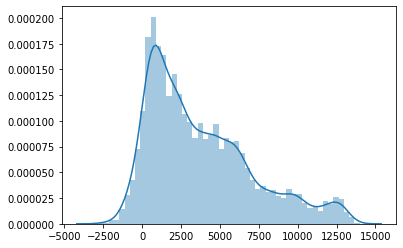

In [80]:
sns.distplot(model_MLR1_new.fittedvalues);

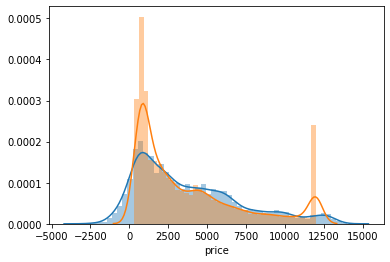

In [81]:
sns.distplot(model_MLR1_new.fittedvalues)
sns.distplot(df['price']);

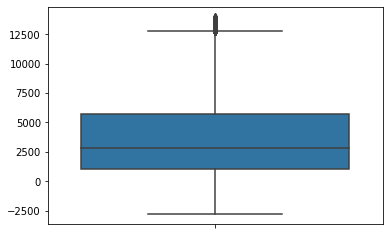

In [82]:
sns.boxplot(model_MLR1_new.fittedvalues,orient='v');

Checking the boxplot and the distplot of the residuals.

In [83]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,8

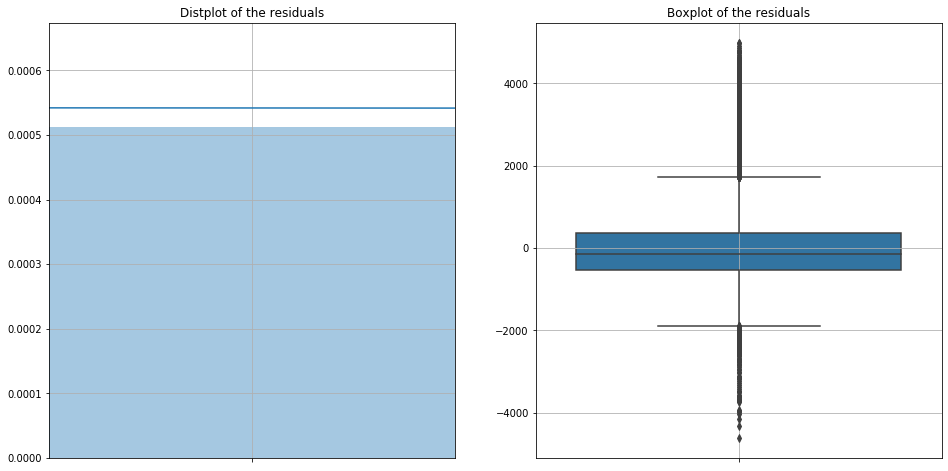

In [96]:
f,a =  plt.subplots(1,2,sharex=True,sharey=False,squeeze=False)

#Plotting the distplot and the boxplot of the residuals for model 8

plot_0 = sns.distplot(model_MLR1_new.resid,ax=a[0][0])
a[0][0].set_title('Distplot of the residuals')
a[0][0].grid()


plot_1 = sns.boxplot(model_MLR_new.resid,orient='v',ax=a[0][1])
a[0][1].set_title('Boxplot of the residuals')
a[0][1].grid();


## Model Evaluation Measures

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [85]:
pred = model_MLR1_new.fittedvalues

In [86]:
##MSE = mean_squared_error(df['Sales'], pred, squared = False)

MSE=mean_squared_error(df['price'], pred)
MSE

724990.6959323231

In [87]:
RMSE = np.sqrt(MSE)
RMSE

851.4638547421276

In [89]:
mean_absolute_error(df['price'], pred)

622.1491575583627

# Problem statement

## Problem 2: Logistic Regression and Linear Discriminant Analysis(LDA)

You are hired by a sports analysis agency to understand the selection process of high school football players into college with a full or partial scholarship. You are provided details of 6215 high school graduates who have been inducted into 4-year degree colleges with either full or partial scholarships.  You have to help the agency in predicting whether a high school graduate will win a full scholarship on the basis of the information given in the data set. Also, find out the important factors which are instrumental in winning a full scholarship in colleges.

# Data dictionary
<b>Variable Name and description</b>

1. <b>Scholarship Won a college scholarship:</b> Full / Partial

2. <b>Academic Score:</b>  High school academic performance of a candidate

3. <b>Score on Plays Made:</b> A composite score based on the achievements on the field

4. <b>Missed Play Score:</b> A composite score based on the failures on the field

5. <b>Injury Propensity:</b> This has 3 ordinal levels: High, Moderate, Normal and Low. It has been calculated based on what proportion of time a candidate had an injury problem

6. <b>School Type:</b> 3 types of schools based on their location

7. <b>School Score:</b> A composite score based on the overall achievement of the candidates’ school, based on the schools academic, sports and community service performance

8. <b>Overall Score:</b> A composite score based on a candidate’s family financial state, school performance, psychosocial attitude etc

9. <b>Region:</b> Region of the country where the school is located

In [87]:
Football_data = pd.read_csv('Football+Scholarship.csv')
Football_data.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,D,0.45,8.8,Eastern,Partial
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,Partial
2,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,Partial
3,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial
4,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial


1. The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, especially identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have a symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. For this is a classification problem, the dependence of the response on the predictors needs to be investigated. Two different classification techniques are to be applied. However, the EDA part remains the same for both. For easier interpretation of the models, later on, it may be better to code Full = 1 and Partial = 0. You may assume the opposite, but then you have to be very careful about the interpretation of the logistic model coefficients later.

In [88]:
Football_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 9 columns):
Academic_Score         6215 non-null float64
Score_on_Plays_Made    6215 non-null float64
Missed_Play_Score      6215 non-null float64
Injury_Propensity      6215 non-null object
School_Type            6215 non-null object
School_Score           6215 non-null float64
Overall_Score          6215 non-null float64
Region                 6215 non-null object
Scholarship            6215 non-null object
dtypes: float64(5), object(4)
memory usage: 437.1+ KB


### Check for duplicate data across columns and drop those

In [89]:
dups = Football_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(Football_data.shape)

Number of duplicate rows = 947
(6215, 9)


In [90]:
Football_data.drop_duplicates(inplace=True) 

In [91]:
dups = Football_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(Football_data.shape)

Number of duplicate rows = 0
(5268, 9)


### Check for missing values and impute the missing values, if any is present.

In [92]:
Football_data.isna().sum()

Academic_Score         0
Score_on_Plays_Made    0
Missed_Play_Score      0
Injury_Propensity      0
School_Type            0
School_Score           0
Overall_Score          0
Region                 0
Scholarship            0
dtype: int64

### Check the data types of all the variables and get the unique counts of all the 'Object' type variables.

In [93]:
for feature in Football_data.columns: 
    if Football_data[feature].dtype == 'object': 
        print(feature)
        print(Football_data[feature].value_counts())
        print('\n')

Injury_Propensity
Low         2323
Normal      1162
Moderate     893
High         890
Name: Injury_Propensity, dtype: int64


School_Type
C    2906
B    1446
D     916
Name: School_Type, dtype: int64


Region
Eastern     2403
Western     1457
Southern    1408
Name: Region, dtype: int64


Scholarship
Partial    3337
Full       1931
Name: Scholarship, dtype: int64




#### Since there are a no values which not falling into any of the major category, no need to encode them into a  new category 

### Check for the basic measures of descriptive statistics.

In [95]:
Football_data.describe()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score
count,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000
mean,7.205363,0.337905,0.320306,0.531380,10.502904
std,1.299212,0.161308,0.146286,0.146938,1.169325
min,3.800000,0.080000,0.000000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,0.430000,9.500000
50%,6.900000,0.290000,0.310000,0.510000,10.300000
75%,7.700000,0.400000,0.400000,0.600000,11.300000
max,15.900000,1.330000,1.660000,1.980000,14.900000


### Check the spread of the data using boxplot for the continuous variables.

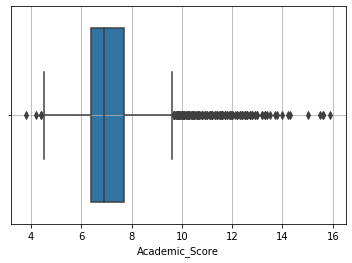

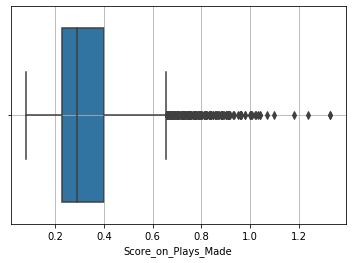

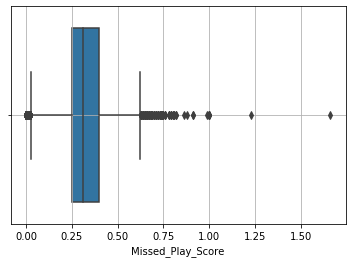

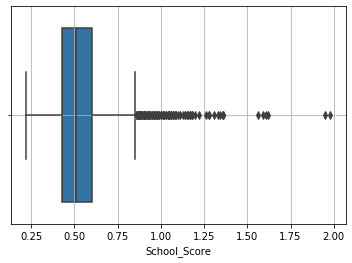

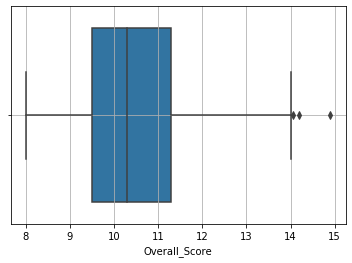

In [96]:
cols = ['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score', 'Overall_Score']
for i in cols:
    sns.boxplot(Football_data[i],whis=1.5)
    plt.grid()
    plt.show();

### Treating the outliers at 1.5 * IQR (Inter-Quartile Range).

In [97]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [98]:
for column in Football_data.columns:
    if Football_data[column].dtype != 'object': 
       lr,ur=remove_outlier(Football_data[column])
       Football_data[column]=np.where(Football_data[column]>ur,ur,Football_data[column])
       Football_data[column]=np.where(Football_data[column]<lr,lr,Football_data[column])

## 2. Build various iterations of the Logistic Regression model using appropriate variable selection techniques for the full data. Compare values of model selection criteria for proposed models. Compare as many criteria as you feel are suitable.

In [99]:
Football_data.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,D,0.45,8.8,Eastern,Partial
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,Partial
2,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,Partial
3,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial
6,6.2,0.32,0.16,Moderate,C,0.47,9.6,Eastern,Full


In [100]:
## We are coding up the 'Scholarship' variable in an ordinal manner

Football_data['Scholarship']=np.where(Football_data['Scholarship'] =='Partial', '0', Football_data['Scholarship'])
Football_data['Scholarship']=np.where(Football_data['Scholarship'] =='Full', '1', Football_data['Scholarship'])


In [101]:
## We are coding up the 'Region' variable in an ordinal manner


Football_data['Region']=np.where(Football_data['Region'] =='Eastern', '1', Football_data['Region'])
Football_data['Region']=np.where(Football_data['Region'] =='Western', '2', Football_data['Region'])
Football_data['Region']=np.where(Football_data['Region'] =='Southern', '3', Football_data['Region'])


In [102]:
## We are coding up the 'Injury_Propensity' variable in an ordinal manner

Football_data['Injury_Propensity']=np.where(Football_data['Injury_Propensity'] =='Low', '1', Football_data['Injury_Propensity'])
Football_data['Injury_Propensity']=np.where(Football_data['Injury_Propensity'] =='Normal', '2', Football_data['Injury_Propensity'])
Football_data['Injury_Propensity']=np.where(Football_data['Injury_Propensity'] =='Moderate', '3', Football_data['Injury_Propensity'])
Football_data['Injury_Propensity']=np.where(Football_data['Injury_Propensity'] =='High', '4', Football_data['Injury_Propensity'])

In [103]:
## We are coding up the 'School_Type' variable in an ordinal manner
Football_data['School_Type']=np.where(Football_data['School_Type'] =='C', '1', Football_data['School_Type'])
Football_data['School_Type']=np.where(Football_data['School_Type'] =='B', '2', Football_data['School_Type'])
Football_data['School_Type']=np.where(Football_data['School_Type'] =='D', '3', Football_data['School_Type'])


In [104]:
Football_data.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,4,3,0.45,8.8,1,0
1,6.3,0.30,0.34,1,1,0.49,9.5,1,0
2,8.1,0.28,0.40,3,1,0.44,10.1,1,0
3,7.2,0.23,0.32,3,1,0.40,9.9,1,0
6,6.2,0.32,0.16,3,1,0.47,9.6,1,1


In [105]:
Football_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 6214
Data columns (total 9 columns):
Academic_Score         5268 non-null float64
Score_on_Plays_Made    5268 non-null float64
Missed_Play_Score      5268 non-null float64
Injury_Propensity      5268 non-null object
School_Type            5268 non-null object
School_Score           5268 non-null float64
Overall_Score          5268 non-null float64
Region                 5268 non-null object
Scholarship            5268 non-null object
dtypes: float64(5), object(4)
memory usage: 411.6+ KB


In [106]:
## Converting the Injury propesity and overall_scorevariable to numeric

Football_data['Injury_Propensity'] = Football_data['Injury_Propensity'].astype('int64')
Football_data['Region'] = Football_data['Region'].astype('int64')
Football_data['School_Type'] = Football_data['School_Type'].astype('int64')



Football_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 6214
Data columns (total 9 columns):
Academic_Score         5268 non-null float64
Score_on_Plays_Made    5268 non-null float64
Missed_Play_Score      5268 non-null float64
Injury_Propensity      5268 non-null int64
School_Type            5268 non-null int64
School_Score           5268 non-null float64
Overall_Score          5268 non-null float64
Region                 5268 non-null int64
Scholarship            5268 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 411.6+ KB


In [107]:
## Converting the 'Scholarship' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [108]:
## Applying the created Label Encoder object for the target class
## Assigning the 0 to <=50k and 1 to >50k

Football_data['Scholarship'] = LE.fit_transform(Football_data['Scholarship'])
Football_data.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,4,3,0.45,8.8,1,0
1,6.3,0.30,0.34,1,1,0.49,9.5,1,0
2,8.1,0.28,0.40,3,1,0.44,10.1,1,0
3,7.2,0.23,0.32,3,1,0.40,9.9,1,0
6,6.2,0.32,0.16,3,1,0.47,9.6,1,1


In [109]:
Football_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 6214
Data columns (total 9 columns):
Academic_Score         5268 non-null float64
Score_on_Plays_Made    5268 non-null float64
Missed_Play_Score      5268 non-null float64
Injury_Propensity      5268 non-null int64
School_Type            5268 non-null int64
School_Score           5268 non-null float64
Overall_Score          5268 non-null float64
Region                 5268 non-null int64
Scholarship            5268 non-null int32
dtypes: float64(5), int32(1), int64(3)
memory usage: 391.0 KB


In [110]:
## Converting the other 'object' type variables as dummy variables

Football_data_dummy = pd.get_dummies(Football_data,drop_first=True)
Football_data_dummy.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,4,3,0.45,8.8,1,0
1,6.3,0.30,0.34,1,1,0.49,9.5,1,0
2,8.1,0.28,0.40,3,1,0.44,10.1,1,0
3,7.2,0.23,0.32,3,1,0.40,9.9,1,0
6,6.2,0.32,0.16,3,1,0.47,9.6,1,1


In [111]:
Football_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 6214
Data columns (total 9 columns):
Academic_Score         5268 non-null float64
Score_on_Plays_Made    5268 non-null float64
Missed_Play_Score      5268 non-null float64
Injury_Propensity      5268 non-null int64
School_Type            5268 non-null int64
School_Score           5268 non-null float64
Overall_Score          5268 non-null float64
Region                 5268 non-null int64
Scholarship            5268 non-null int32
dtypes: float64(5), int32(1), int64(3)
memory usage: 391.0 KB


## Building the Logistic Regression Model using all the variables on the full data and check the summary statistics of the model. Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).

In [112]:
import statsmodels.formula.api as sm

In [113]:
Football_data_dummy.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Type', 'School_Score', 'Overall_Score',
       'Region', 'Scholarship'],
      dtype='object')

In [114]:

formula_1='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+Injury_Propensity+School_Type+School_Score+Overall_Score+Region'

In [115]:
Logistic_1 = sm.logit(formula=formula_1,data=Football_data_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.458771
         Iterations 6


In [116]:
Logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5259
Method:                           MLE   Df Model:                            8
Date:                Sun, 11 Apr 2021   Pseudo R-squ.:                  0.3018
Time:                        10:37:47   Log-Likelihood:                -2416.8
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -6.4414      0.510    -12.618      0.000      -7.442      -5.441
Academic_Score          0.6234      0.040     15.601      0.000       0.545       0.702
Score_on_Plays_Made     6.0923      0.309     19.694      0.000       5.486       6.699
Missed_Play_Score      -1.4698      0.338     -4.349      0.000      -2.132      -0.807
Injury_Propensity      -0.3209      0.036     -8.893      0.000      -0.392      -0.250
School_Type             0.0280      0.051      0.545      0.586      -0.073       0.129
School_Score            3.9704      0.294     13.492      0.000       3.394       4.547
Overall_Score          -0.1226      0.033     -3.706      0.000      -0.187      -0.058
Region                 -0.2260      0.044     -5.122      0.000      -0.312      -0.140
=======================================================================================
"""

### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).

In [117]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [118]:
vif_cal(input_data=Football_data_dummy.drop('Scholarship',axis=1))

Academic_Score  VIF =  1.41
Score_on_Plays_Made  VIF =  1.47
Missed_Play_Score  VIF =  1.52
Injury_Propensity  VIF =  1.26
School_Type  VIF =  1.09
School_Score  VIF =  1.19
Overall_Score  VIF =  1.18
Region  VIF =  1.05


### Dropping the variable which is the most insignificant in the previous model. Build a second iteration of the model on the full data. Check the VIF values of the predictor variables.

In [119]:

formula_2='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+Injury_Propensity+School_Type+School_Score+Overall_Score'

In [120]:
Logistic_2 = sm.logit(formula=formula_2,data=Football_data_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.461286
         Iterations 6


In [121]:
Logistic_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5260
Method:                           MLE   Df Model:                            7
Date:                Sun, 11 Apr 2021   Pseudo R-squ.:                  0.2980
Time:                        10:39:34   Log-Likelihood:                -2430.1
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -7.1088      0.496    -14.325      0.000      -8.081      -6.136
Academic_Score          0.6205      0.040     15.573      0.000       0.542       0.699
Score_on_Plays_Made     5.9444      0.306     19.432      0.000       5.345       6.544
Missed_Play_Score      -1.5105      0.336     -4.501      0.000      -2.168      -0.853
Injury_Propensity      -0.3237      0.036     -8.971      0.000      -0.394      -0.253
School_Type             0.0302      0.051      0.588      0.556      -0.070       0.131
School_Score            4.0196      0.294     13.669      0.000       3.443       4.596
Overall_Score          -0.0929      0.032     -2.860      0.004      -0.157      -0.029
=======================================================================================
"""

In [122]:
vif_cal(input_data=Football_data_dummy.drop(['Scholarship','Region'],axis=1))

Academic_Score  VIF =  1.41
Score_on_Plays_Made  VIF =  1.46
Missed_Play_Score  VIF =  1.51
Injury_Propensity  VIF =  1.26
School_Type  VIF =  1.09
School_Score  VIF =  1.18
Overall_Score  VIF =  1.15


## Model 3

In [123]:

formula_3='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+Injury_Propensity+School_Score+Overall_Score'

In [124]:
Logistic_3 = sm.logit(formula=formula_3,data=Football_data_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.461319
         Iterations 6


In [125]:
Logistic_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5261
Method:                           MLE   Df Model:                            6
Date:                Sun, 11 Apr 2021   Pseudo R-squ.:                  0.2979
Time:                        10:40:17   Log-Likelihood:                -2430.2
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -7.1187      0.496    -14.356      0.000      -8.091      -6.147
Academic_Score          0.6221      0.040     15.659      0.000       0.544       0.700
Score_on_Plays_Made     5.9508      0.306     19.467      0.000       5.352       6.550
Missed_Play_Score      -1.4848      0.333     -4.464      0.000      -2.137      -0.833
Injury_Propensity      -0.3189      0.035     -9.077      0.000      -0.388      -0.250
School_Score            4.0254      0.294     13.694      0.000       3.449       4.601
Overall_Score          -0.0907      0.032     -2.811      0.005      -0.154      -0.027
=======================================================================================
"""

In [126]:
vif_cal(input_data=Football_data_dummy.drop(['Scholarship','Region','School_Type'],axis=1))

Academic_Score  VIF =  1.39
Score_on_Plays_Made  VIF =  1.46
Missed_Play_Score  VIF =  1.49
Injury_Propensity  VIF =  1.22
School_Score  VIF =  1.18
Overall_Score  VIF =  1.14


## 3. Split the data into training (70%) and test (30%). Build the various iterations of the Linear Regression models on the training data and use those models to predict on the test data using appropriate model evaluation metrics.

#### Splitting the data into training (70%) and test (30%) in such a way that the uniformity in the training as well as test is maintained every time the code is run. Check the whether the proportion of the different classes within the target variable is same across train and test.

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
Train,Test = train_test_split(Football_data_dummy,test_size=0.3,random_state=1,stratify=Football_data_dummy['Scholarship'])

In [130]:
Train.shape

(3687, 9)

In [131]:
Test.shape

(1581, 9)

In [132]:
Train['Scholarship'].value_counts(1)

0    0.633577
1    0.366423
Name: Scholarship, dtype: float64

In [133]:
Test['Scholarship'].value_counts(1)

0    0.633144
1    0.366856
Name: Scholarship, dtype: float64

# Build the models 1 and 2 on the training data, check the accuracy score of each of the models on the training data and use those models to predict the classes and the corresponding probabilities on the test data. 

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
LR = LogisticRegression(solver='newton-cg',penalty='none')

### Model 1 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [137]:
model_1 = LR.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score','Region']],Train['Scholarship'])


In [138]:

print('Accuracy Score of Model 1:',model_1.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score','Region']],Train['Scholarship']))

Accuracy Score of Model 1: 0.8310279359913209


### Model 1 - Predicting the classes and the probabilities on the Test Data

In [139]:
model_1_test_class = model_1.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score','Region']])
model_1_test_probabilities = model_1.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score','Region']])

### Model 2 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [140]:

model_2 = LR.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score']],Train['Scholarship'])

In [141]:

print('Accuracy Score of Model 2:',model_2.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score']],Train['Scholarship']))

Accuracy Score of Model 2: 0.8258746948738812


### Model 2 - Predicting the classes and the probabilities on the Test Data

In [142]:

model_2_test_class = model_2.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score']])
model_2_test_probabilities = model_2.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score']])

### Model 3 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [143]:

model_3 = LR.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score']],Train['Scholarship'])

In [144]:

print('Accuracy Score of Model 3:',model_3.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score']],Train['Scholarship']))

Accuracy Score of Model 3: 0.8266883645240033


### Model 3 - Predicting the classes and the probabilities on the Test Data

In [145]:

model_3_test_class = model_3.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score']])
model_3_test_probabilities = model_3.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score']])

## Interpret Logistic Model - Using Sklearn Model

Estimated Regression Equation:
logit (p) = βo + β1 x1

odds ration is = exp(coef(model_3))

Probability of an even happening = exp(coef(model_3))/(1+exp(coef(model_3)))

In [146]:

final_train= Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score']]

In [147]:
df=pd.DataFrame({'odds_ratio':(np.exp(model_3.coef_).T).tolist(),'Probability':(np.exp(model_3.coef_)/(1+np.exp(model_3.coef_))).T.tolist()  ,'variable':final_train.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,Probability,variable
1,435.353941,[0.9977082824173269],Score_on_Plays_Made
4,65.422581,[0.9849448788165032],School_Score
0,1.838213,[0.6476655846410909],Academic_Score
5,0.899330,[0.47349859399795574],Overall_Score
3,0.726357,[0.4207455839149228],Injury_Propensity
2,0.254235,[0.20270096026146872],Missed_Play_Score


In [148]:
## using statsmodel library

params = Logistic_3.params
conf = Logistic_3.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                             5%         95%  Odds Ratio
Intercept              0.000306    0.002140    0.000810
Academic_Score         1.723305    2.013696    1.862851
Score_on_Plays_Made  210.965122  699.214782  384.070217
Missed_Play_Score      0.118045    0.434766    0.226544
Injury_Propensity      0.678583    0.778770    0.726953
School_Score          31.476427   99.631529   56.000398
Overall_Score          0.857269    0.972914    0.913262


## Evaluating the three models on the test data using the various statistics of the confusion matrix.

In [149]:
from sklearn import metrics

### Confusion Matrix summary statistics Evaluation on the Test Data

In [150]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

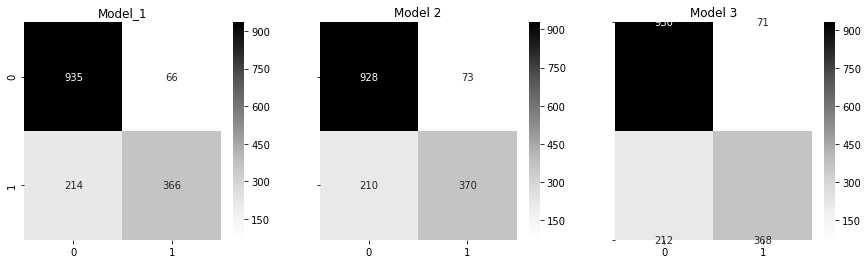

In [151]:
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_1_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_2_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Model 2');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_3_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('Model 3');

In [152]:
print('Model 1')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 2')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_2_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 3')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_3_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

Model 1
True Negative: 935 
False Positives: 66 
False Negatives: 214 
True Positives: 366 


Model 2
True Negative: 928 
False Positives: 73 
False Negatives: 210 
True Positives: 370 


Model 3
True Negative: 930 
False Positives: 71 
False Negatives: 212 
True Positives: 368


In [153]:
print('Model 1')
print(metrics.classification_report(Test['Scholarship'],model_1_test_class),'\n')

print('Model 2')
print(metrics.classification_report(Test['Scholarship'],model_2_test_class),'\n')

print('Model 3')
print(metrics.classification_report(Test['Scholarship'],model_3_test_class))

Model 1
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1001
           1       0.85      0.63      0.72       580

    accuracy                           0.82      1581
   macro avg       0.83      0.78      0.80      1581
weighted avg       0.83      0.82      0.82      1581
 

Model 2
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1001
           1       0.84      0.64      0.72       580

    accuracy                           0.82      1581
   macro avg       0.83      0.78      0.80      1581
weighted avg       0.82      0.82      0.81      1581
 

Model 3
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1001
           1       0.84      0.63      0.72       580

    accuracy                           0.82      1581
   macro avg       0.83      0.78      0.80      1581
weighted avg       0.82      0.82      0.81   

##  Check the summary statistics of the AUC-ROC curve for all the three Logistic Regression Models built. This is for the test data.

In [154]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

Model 1 AUC: 0.80573


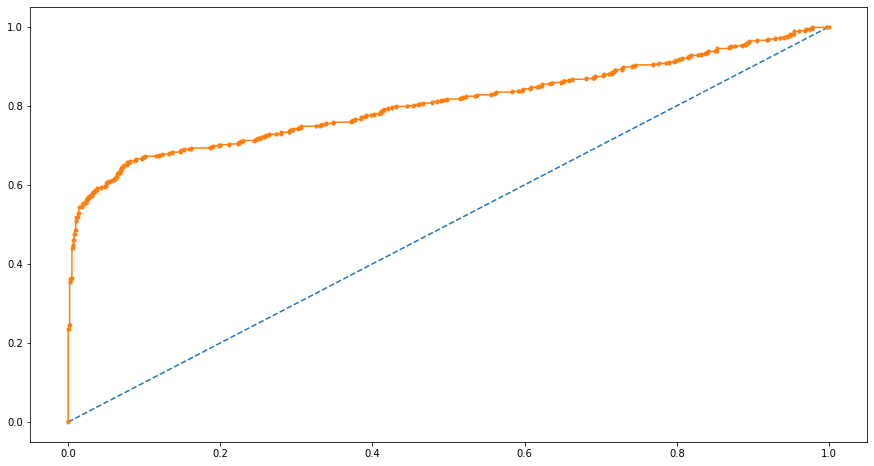

Model 2 AUC: 0.80531


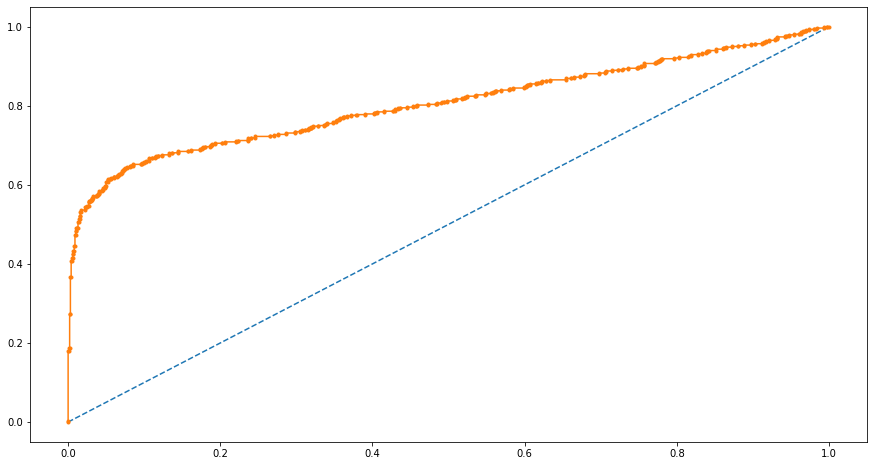

Model 3 AUC: 0.80551


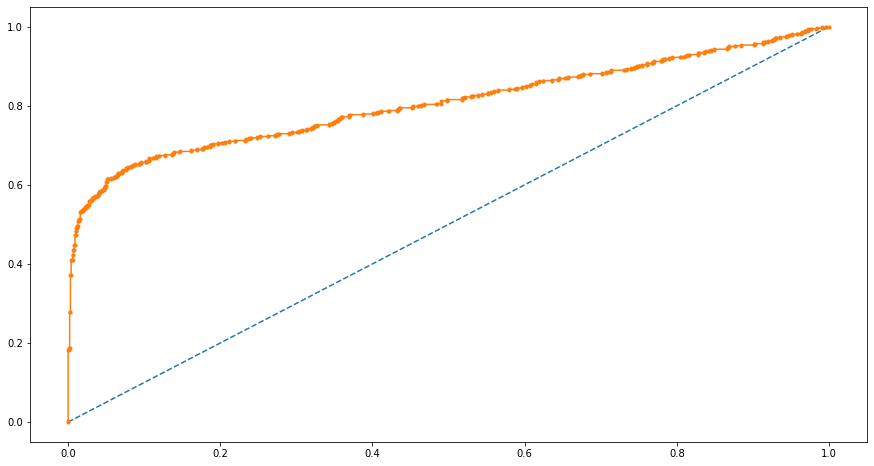

In [155]:
# AUC and ROC for the model 1


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the model 2


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 2 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 3 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## 4. Use the same training-test data split in Part (III) to develop a suitable Linear Discriminant Analysis (LDA) model. Use the same to on the test data. Compare the final output from the logistic regression model and LDA.

### Building three Linear Discriminant Analysis models [using the variables used in the three different models of Logistic Regression] on the training data, check their accuracy scores on the training data and use those models to predict the classes and the corresponding probabilities on the test data.

In [156]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [157]:
LDA = LinearDiscriminantAnalysis()

### Model 1 - Building the LDA model on the Training Data and checking the Accuracy score on the training data.

In [158]:
model_1_LDA = LDA.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score','Region']],Train['Scholarship'])

In [159]:
print('Accuracy Score of LDA Model 1:',model_1_LDA.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score','Region']],Train['Scholarship']))

Accuracy Score of LDA Model 1: 0.8310279359913209


In [160]:

model_1_LDA_test_class = model_1_LDA.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score','Region']])
model_1_LDA_test_probabilities = model_1_LDA.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score','Region']])

## Model 2 - Building the LDA model on the Training Data and checking the Accuracy score on the training data

In [161]:
model_2_LDA = LDA.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score']],Train['Scholarship'])
print('Accuracy Score of LDA Model 2:',model_2_LDA.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score']],Train['Scholarship']))

Accuracy Score of LDA Model 2: 0.8307567127746135


In [162]:

model_2_LDA_test_class = model_2_LDA.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score']])
model_2_LDA_test_probabilities = model_2_LDA.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Type','School_Score','Overall_Score']])


## Model 3 - Building the LDA model on the Training Data and checking the Accuracy score on the training data.

In [163]:

model_3_LDA = LDA.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score']],Train['Scholarship'])
print('Accuracy Score of LDA Model 3:',model_3_LDA.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score']],Train['Scholarship']))

Accuracy Score of LDA Model 3: 0.8304854895579061


In [164]:

model_3_LDA_test_class = model_3_LDA.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score']])
model_3_LDA_test_probabilities = model_3_LDA.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score']])

## Evaluating the three LDA models on the test data using the various statistics of the confusion matrix and the AUC-ROC curve.

### Confusion Matrix Summary Statistics evaluation on the Test Data

In [165]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

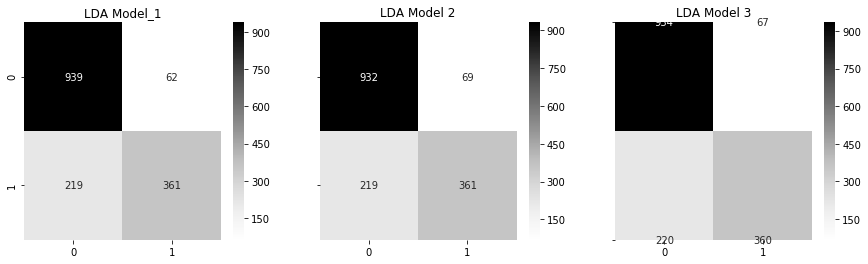

In [166]:
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_1_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LDA Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_2_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LDA Model 2');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_3_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('LDA Model 3');



In [167]:
print('LDA Model 1')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_1_LDA_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('LDA Model 2')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_2_LDA_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('LDA Model 3')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_3_LDA_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

LDA Model 1
True Negative: 939 
False Positives: 62 
False Negatives: 219 
True Positives: 361 


LDA Model 2
True Negative: 932 
False Positives: 69 
False Negatives: 219 
True Positives: 361 


LDA Model 3
True Negative: 934 
False Positives: 67 
False Negatives: 220 
True Positives: 360


In [168]:
print('LDA Model 1')
print(metrics.classification_report(Test['Scholarship'],model_1_LDA_test_class),'\n')

print('LDA Model 2')
print(metrics.classification_report(Test['Scholarship'],model_2_LDA_test_class),'\n')

print('LDA Model 3')
print(metrics.classification_report(Test['Scholarship'],model_3_LDA_test_class))

LDA Model 1
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1001
           1       0.85      0.62      0.72       580

    accuracy                           0.82      1581
   macro avg       0.83      0.78      0.79      1581
weighted avg       0.83      0.82      0.81      1581
 

LDA Model 2
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1001
           1       0.84      0.62      0.71       580

    accuracy                           0.82      1581
   macro avg       0.82      0.78      0.79      1581
weighted avg       0.82      0.82      0.81      1581
 

LDA Model 3
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1001
           1       0.84      0.62      0.71       580

    accuracy                           0.82      1581
   macro avg       0.83      0.78      0.79      1581
weighted avg       0.82      0.82 

### AUC-ROC summary statistics Evaluation on the Test Data. Calculate the AUC-ROC curves and the AUC values.

LDA Model 1 AUC: 0.80527


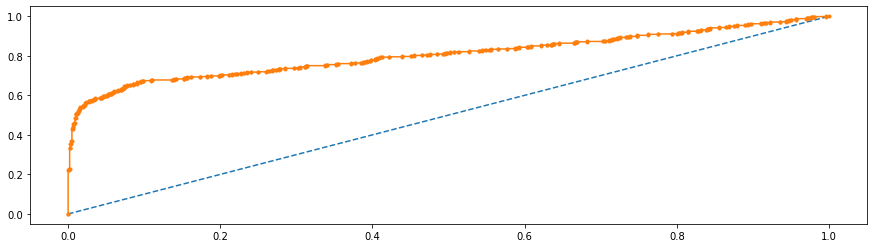

LDA Model 2 AUC: 0.80482


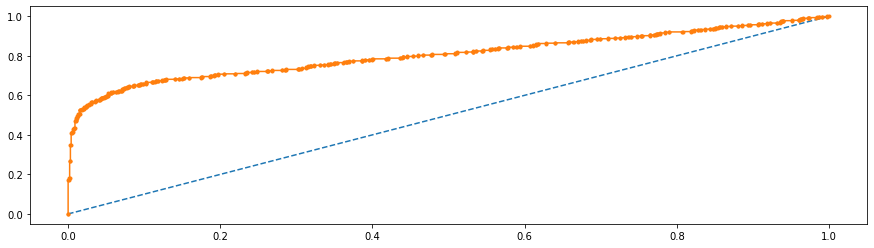

LDA Model 3 AUC: 0.80522


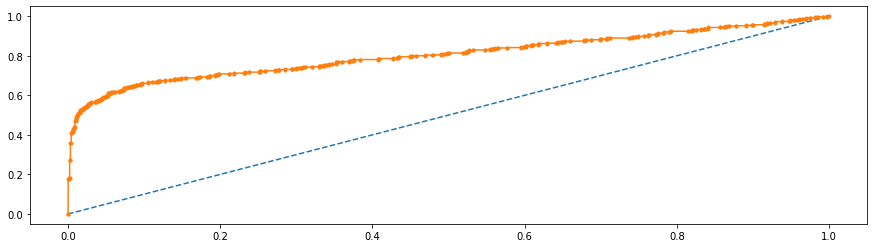

In [169]:
# AUC and ROC for the model 1


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_1_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_1_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the model 2


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_2_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Model 2 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_2_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_3_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Model 3 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_3_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()